### Answers to Assignment 3 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1

$$E_n(Y_{n+1})=E_n(\hat{\mu}+\hat{\phi_1}Y_{n}+\epsilon_{n+1}+\hat{\theta_1}\epsilon_n+\hat{\theta_2}\epsilon_{n-1})=\hat{\mu}+\hat{\phi_1}Y_{n}+\hat{\theta_1}\epsilon_n+\hat{\theta_2}\epsilon_{n-1}=128.275$$

$$E_n(Y_{n+2})=E_n(\hat{\mu}+\hat{\phi_1}Y_{n+1}+\epsilon_{n+2}+\hat{\theta_1}\epsilon_{n+1}+\hat{\theta_2}\epsilon_{n})=128.005$$

### Q2

(a)

$$\gamma_j=\begin{cases}
(1+\theta_1^2+\theta_2^2)\sigma^2 & j=0\\
(\theta_1 + \theta_2\theta_1) \sigma^2 & j=1\\
\theta_2 \sigma^2 & j=2\\
0 & otherwise
\end{cases}$$
We could observe that for lags > 2, there is no covariance so that $x_t$ is covariance stationary.

(b)

$$Var(\bar{x_T})=\frac{1}{T^2}(\sum_{i=1}^TVar(x_i)+2\sum_{i\neq j}Cov(x_i,x_j))$$
$$=\frac{1}{T^2}(\sigma^2(1+\theta_1^2+\theta_2^2)T+2(T-1)(\theta_1+\theta_2\theta_1)\sigma^2+2(T-2)(\theta_2\sigma^2))$$
$$=\frac{\sigma^2}{T^2}(T(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1)-4\theta_2-2\theta_1-2\theta_1\theta_2)$$
$$\lim_{T \rightarrow \infty}{Var(\bar{x_T})}=0$$

(c)

$$E(\sqrt{T}\bar{x_T})=0$$
$$Var(\sqrt{T}\bar{x_T})=\sigma^2(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1-\frac{1}{T}(4\theta_2+2\theta_1+2\theta_1\theta_2))$$
$$\lim_{T \rightarrow \infty}{Var(\sqrt{T}\bar{x_T})}=\sigma^2(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1)$$

### Q3

(a)

$$y_1=c + \phi y_0 + \epsilon_1$$
$$y_2=c + \phi y_1 + \epsilon_2=c(1 + \phi) + \phi^2 y_0 + \phi \epsilon_1 + \epsilon_2$$
By induction
$$y_t=c\sum_{i=1}^t\phi^{i-1}+\sum_{i=1}^t\phi^{i-1}\epsilon_{t-(i-1)}+\phi^ty_0$$
$$E(y_t)=c\sum_{i=1}^t\phi^{i-1}+\phi^tE(y_0)$$
$$Var(y_t)=\phi^{2t}Var(y_0)+\sum_{i=1}^t\phi^{2i-2}\sigma^2$$
$$Cov(y_t,y_{t+j})=\phi^{2t+j}Var(y_0)+\sum_{i=1}^{t}\phi^{2i-2+j}\sigma^2$$

(b)

Due to $|\phi|<1$
$$\lim_{t\rightarrow \infty}E(y_t)=\lim_{t\rightarrow \infty}c\sum_{i=1}^t\phi^{i-1}+\phi^tE(y_0)=c\frac{1}{1-\phi}=\mu$$

$$\lim_{t\rightarrow \infty}Var(y_t)=\lim_{t\rightarrow \infty}\phi^{2t}Var(y_0)+\sum_{i=1}^t\phi^{2i-2}\sigma^2=\frac{\sigma^2}{1-\phi^2}=\gamma_0$$

$$\lim_{t\rightarrow \infty}Cov(y_t,y_{t+j})=\lim_{t\rightarrow \infty}\phi^{2t+j}Var(y_0)+\sum_{i=1}^{t}\phi^{2i-2+j}\sigma^2$$
$$=\frac{\phi^j}{1-\phi^2}\sigma^2=\gamma_j$$


(c)

$$E(y_t)=c\sum_{i=1}^t\phi^{i-1}+\phi^t\frac{c}{1-\phi}=\frac{1-\phi^t}{1-\phi}c+\phi^t\frac{c}{1-\phi}=\mu <\infty$$
$$Var(y_t)=\phi^{2t}\gamma_0+\sum_{i=1}^t\phi^{2i-2}\sigma^2=\frac{\sigma^2\phi^{2t}}{1-\phi^2}+\frac{1-\phi^{2t}}{1-\phi^2}\sigma^2=\gamma_0 < \infty$$
$$Cov(y_t,y_{t+j})=\frac{\sigma^2\phi^{2t+j}}{1-\phi^2}+\frac{1-\phi^{2t}}{1-\phi^2}\sigma^2\phi^j=\gamma_j$$

We could observe covariance stationarity

### Q4

(a)

In [37]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
def calc_ols(y, lags=1):
    y_lags = []
    for i in range(lags):
        y_lags.append(y[i:len(y)-(lags-i)])
    y_lags = np.array(y_lags).T
    y_ = np.array(y[lags:]).reshape(len(y_lags),1)
    y_lags = np.concatenate((np.ones((len(y_lags), 1)), y_lags), axis=1)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(y_lags.T, y_lags)),y_lags.T),y_)
    residual = y_ - np.dot(y_lags, coef)
    return coef, residual

In [40]:
from statsmodels.tsa.stattools import acf, pacf
phi_poly = np.r_[1, -0.8]
theta_poly = np.r_[1, 0.7]
arma_process = ArmaProcess(phi_poly, theta_poly)
acfs = []
pacfs = []
phis = []
for i in range(1000):
    data = arma_process.generate_sample(1000)
    coef, residual = calc_ols(data, lags=1)
    model_fit = model.fit()
    acfs.append(acf(residual))
    pacfs.append(pacf(residual))
    phis.append(coef[1][0])

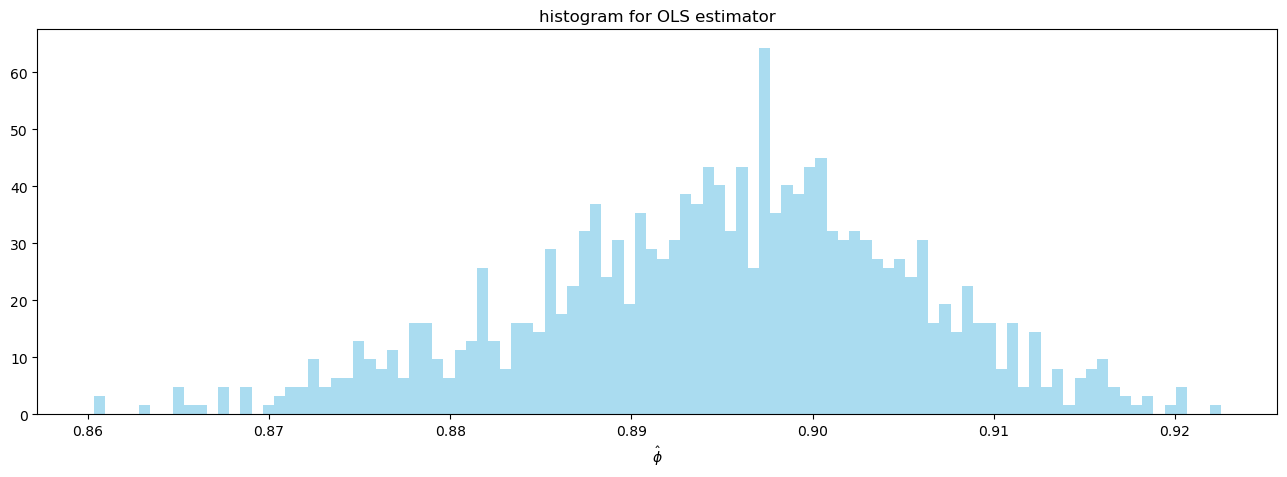

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.hist(phis, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'actual $\hat{\beta}$')
axes.set_title("histogram for OLS estimator")
axes.set_xlabel(r'$\hat{\phi}$')
plt.show()

The $\hat{\phi}$ is not close to true value $\phi=0.8$. This could be due to shock $\epsilon_t$ MA(1)

(b)

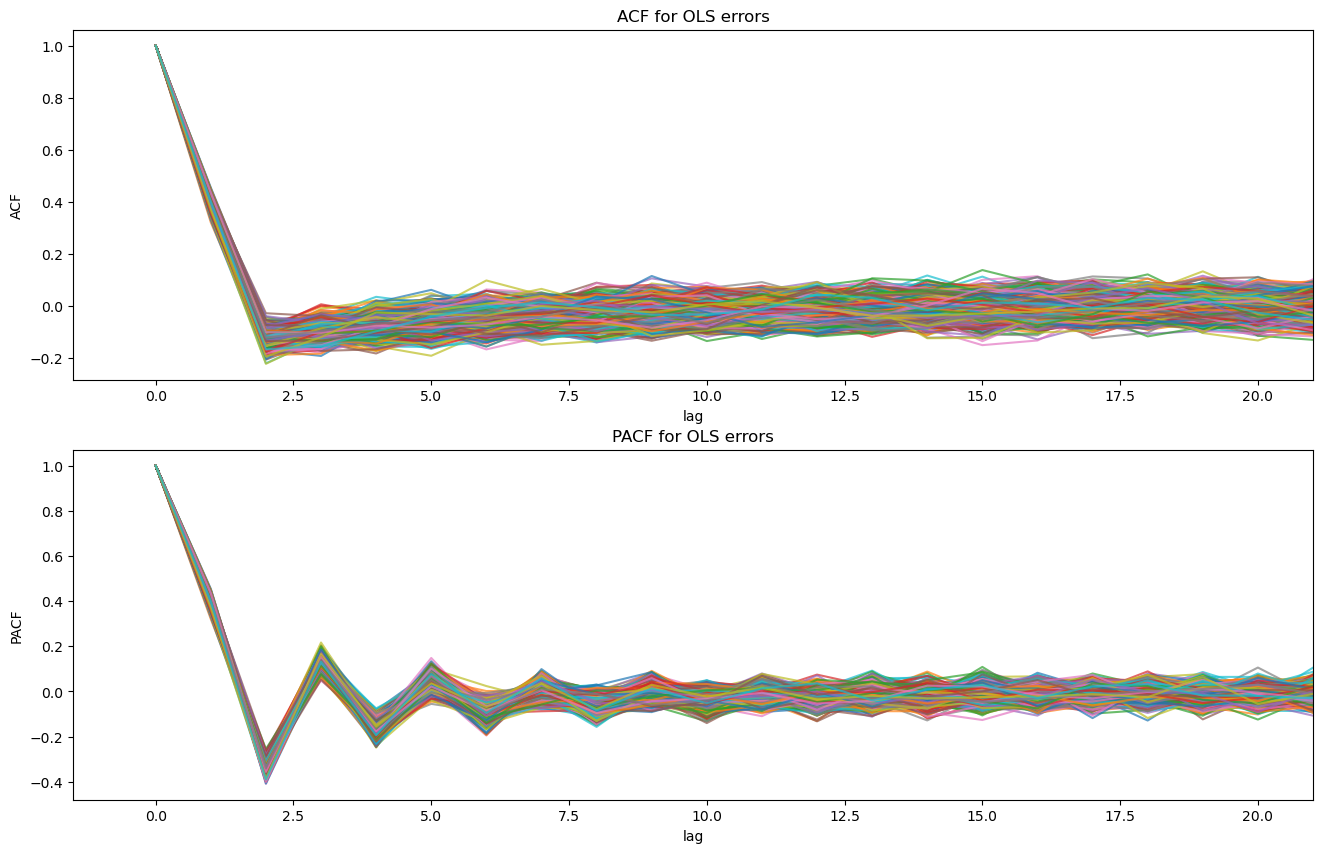

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))
for i in range(1000):
    axes[0].plot(acfs[i],alpha = 0.7)
    axes[1].plot(pacfs[i],alpha = 0.7)
axes[0].set_xlabel("lag")
axes[0].set_ylabel("ACF")
axes[0].set_title("ACF for OLS errors")
axes[0].axis(xmax=21)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("PACF")
axes[1].set_title("PACF for OLS errors")
axes[1].axis(xmax=21)
plt.show()

We could observe from ACF plot that error autocorrelation dies out at lag=2. And according to PACF, at lag=1, PACF is close to 1 which equals the true $\theta$. 

# Question 5

**Generating an AR(3) process**

In [11]:
N = 1000    # number of simulations
x = np.zeros((N, N))
lambda_1 = 0.95
lambda_2 = 0.9
lambda_3 = 0.8
for i in range(3, N):
    e_t = np.random.normal(0, 1, N)
    x[:, i] = (lambda_1 + lambda_2 + lambda_3) * x[:, i - 1] - \
              (lambda_1 * lambda_2 + lambda_2 * lambda_3 + lambda_1 * lambda_3) * x[:, i - 2] + \
              (lambda_1 * lambda_2 * lambda_3) * x[:, i - 3] + \
              e_t

**Estimating using an AR(1), AR(2), AR(3), AR(4)**

In [14]:
phi_list_ar1 = []
phi_list_ar2 = []
phi_list_ar3 = []
phi_list_ar4 = []

error_list_ar1 = []
error_list_ar2 = []
error_list_ar3 = []
error_list_ar4 = []

# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by shifting the array
    df = pd.DataFrame(data=[x[i, 4:], x[i, 3:N-1], x[i, 2:N-2], x[i, 1:N-3], x[i, 0:N-4]]).T.dropna()
    df.columns = ["y", "x1", "x2", "x3", "x4"]
    
    # Run the OLS using statsmodels
    X1 = df[["x1"]]
    X2 = df[["x1", "x2"]]
    X3 = df[["x1", "x2", "x3"]]
    X4 = df[["x1", "x2", "x3", "x4"]]
    Y = df["y"]
    
    #X1 = sm.add_constant(X1)
    ##X2 = sm.add_constant(X2)
    #X3 = sm.add_constant(X3)
    #X4 = sm.add_constant(X4)
    
    model_ar1 = sm.OLS(Y,X1)
    model_ar2 = sm.OLS(Y,X2)
    model_ar3 = sm.OLS(Y,X3)
    model_ar4 = sm.OLS(Y,X4)

    results_ar1 = model_ar1.fit()
    results_ar2 = model_ar2.fit()
    results_ar3 = model_ar3.fit()
    results_ar4 = model_ar4.fit()

    
    # Appending to list of parameters for every simulation
    phi_list_ar1.append(results_ar1.params.iloc[0])
    phi_list_ar2.append(results_ar2.params.iloc[0])
    phi_list_ar3.append(results_ar3.params.iloc[0])
    phi_list_ar4.append(results_ar4.params.iloc[0])

    
    # Predicting and storing the error
    error_list_ar1.append(Y - results_ar1.predict(X1))
    error_list_ar2.append(Y - results_ar2.predict(X2))
    error_list_ar3.append(Y - results_ar3.predict(X3))
    error_list_ar4.append(Y - results_ar4.predict(X4))

**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(1)**

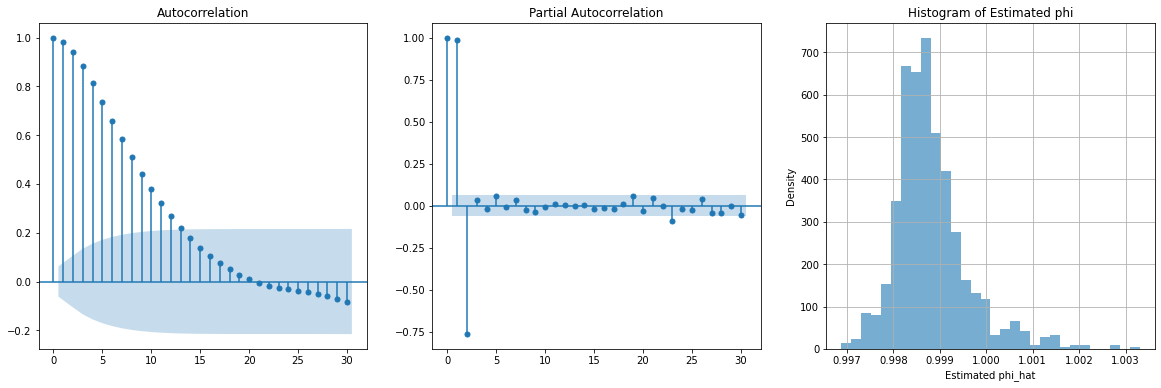

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar1[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar1[0], ax=ax[1])

ax[2].hist(phi_list_ar1, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)

**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(2)**

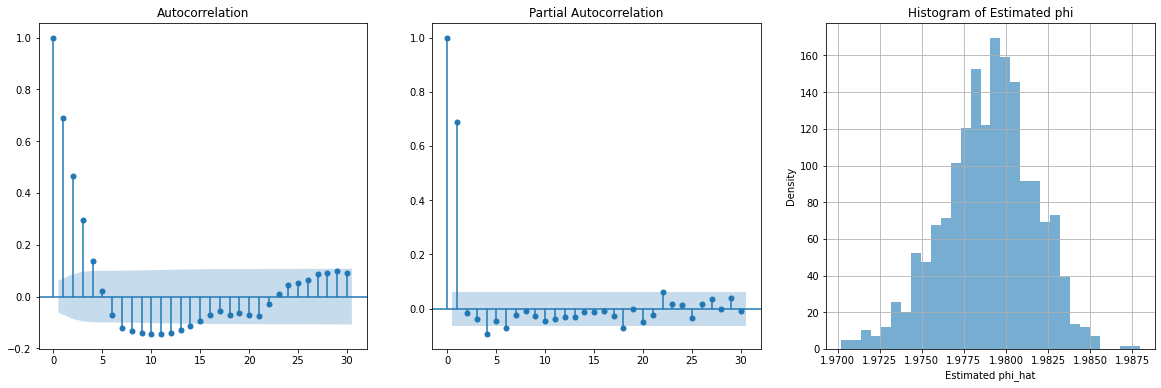

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar2[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar2[0], ax=ax[1])

ax[2].hist(phi_list_ar2, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)

**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(3)**

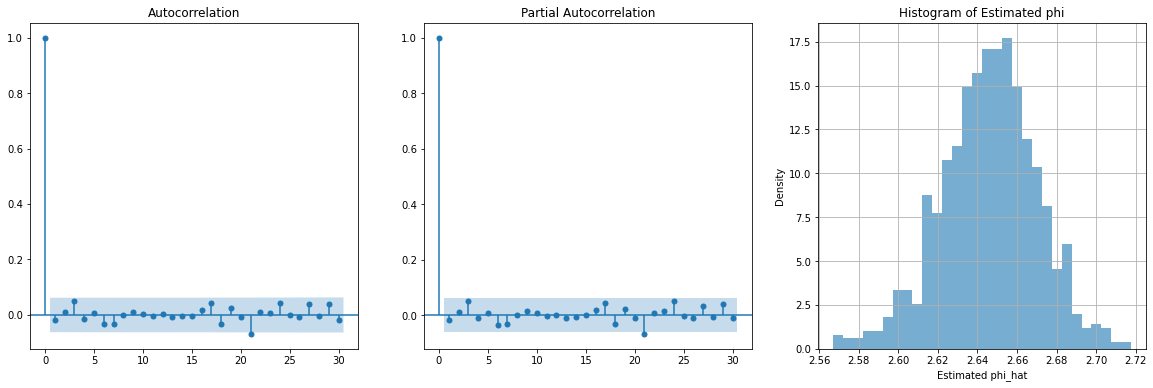

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar3[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar3[0], ax=ax[1])

ax[2].hist(phi_list_ar3, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)


**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(4)**


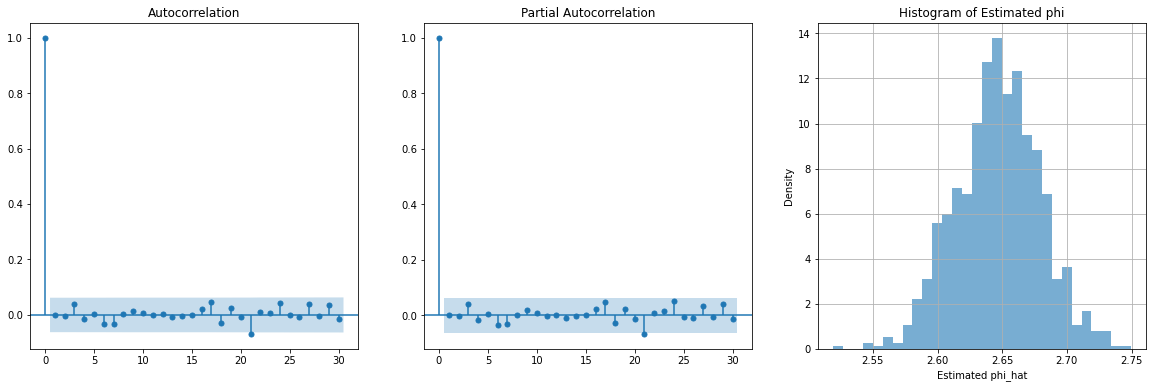

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar4[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar4[0], ax=ax[1])

ax[2].hist(phi_list_ar4, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)


**Observations from the residuals**

As the number of lags in our OLS estimate increases, we start getting closer to an accurate expectation value of the $\hat{\phi}$ parameter. For AR(1) and AR(2) error ACF functions, we see strong autocorrelations between the residuals because the actual process is AR(3). Once we reach AR(3) in the model, the autocorrelation in the residuals completely disappears. 

The central learning from this simulation experiment - 

To model any AR process, start with AR(1) and look at the autocorrelation in the residuals. Once a p is found such that autocorrelations in residuals for AR(p) go to zero, we can safely say that the AR process has been modelled correctly. Even if we choose a higher p than the actual, it is fine since OLS will drive the parameter for the (p + 1) th lag to 0.

# Question 6

In [21]:
N = 1000    # number of simulations
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x_1_i = np.random.normal(0, 1, N)
    x1_arr.append(x_1_i)
    x_2_i = np.random.normal(0, 1, N)
    y[:, i] = x_1_i + x_2_i + e_t # Creating the process 

**Estimating the AR process using OLS regression**

In [22]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Histogram of estimated $\hat{\beta}$**

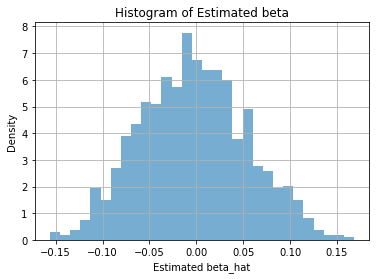

In [23]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated beta')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

In [24]:
means = [0, 0]
covariance_matrix = [[1, 0.5], [0.5, 1]]
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x = np.random.multivariate_normal(means, covariance_matrix, N).T
    x1_arr.append(x[0])
    y[:, i] = x[0] + x[1] + e_t # Creating the process 

**Estimating the AR process using OLS regression with $\hat{\rho}$= 0.5**

In [26]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

**Histogram of estimated $\hat{\beta}$ with $\hat{\rho}$= 0.5** 

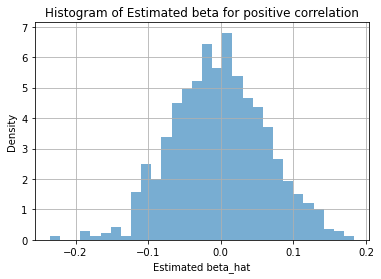

In [28]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated beta for positive correlation')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

In [29]:
means = [0, 0]
covariance_matrix = [[1, -0.5], [-0.5, 1]]
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x = np.random.multivariate_normal(means, covariance_matrix, N).T
    x1_arr.append(x[0])
    y[:, i] = x[0] + x[1] + e_t # Creating the process 

In [30]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

**Histogram of estimated $\hat{\beta}$ with $\hat{\rho}$= -0.5** 

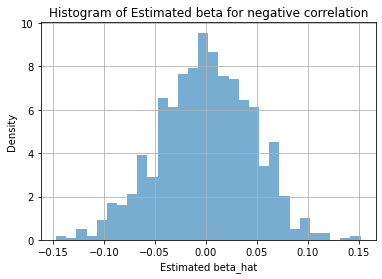

In [31]:
fig = plt.hist(phi_list, 
               bins=30,
               density=True,
               alpha=0.6)
plt.title('Histogram of Estimated beta for negative correlation')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

We see that the histogram plots for estimated beta are somewhat biased (this is mitigated in part by the number of observations). The distributions look different from a normal distribution.

# Question 7

In [32]:

import pandas_datareader.data as web
start = '1953-01-01'
end = '2020-02-01'
data = web.DataReader(['DTB3'], 'fred', start, end).resample('M').last().dropna()


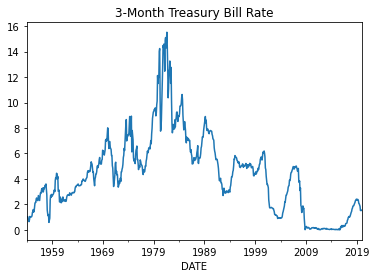

In [33]:

data["DTB3"].plot()
plt.title("3-Month Treasury Bill Rate")
plt.show()

In [34]:
data

,DTB3
DATE,
1954-01-31,1.02
1954-02-28,1.00
1954-03-31,1.03
1954-04-30,0.81
1954-05-31,0.72
...,...
2019-09-30,1.84
2019-10-31,1.51
2019-11-30,1.56


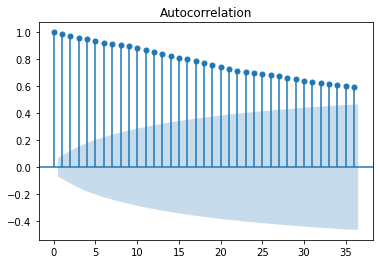

In [35]:
# Use statsmodels to get an ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["DTB3"], lags=36)
plt.show()

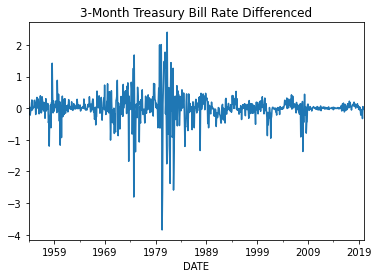

In [36]:
data["DTB3"].diff().plot()
plt.title("3-Month Treasury Bill Rate Differenced")
plt.show()

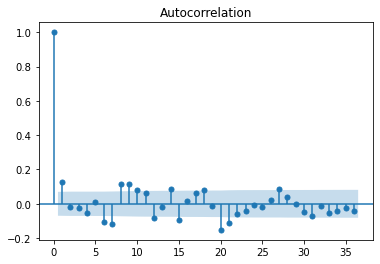

In [37]:
plot_acf(data["DTB3"].diff().dropna(), lags=36)
plt.show()

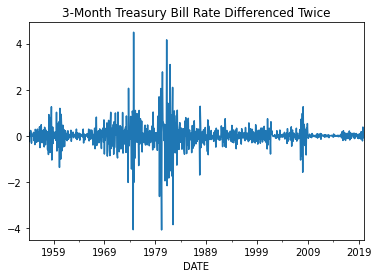

In [38]:
data["DTB3"].diff().diff().dropna().plot()
plt.title("3-Month Treasury Bill Rate Differenced Twice")
plt.show()

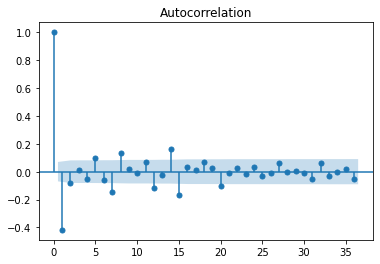

In [39]:
plot_acf(data["DTB3"].diff().diff().dropna(), lags=36)
plt.show()

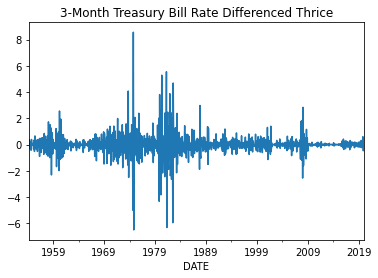

In [40]:
data["DTB3"].diff().diff().diff().dropna().plot()
plt.title("3-Month Treasury Bill Rate Differenced Thrice")
plt.show()

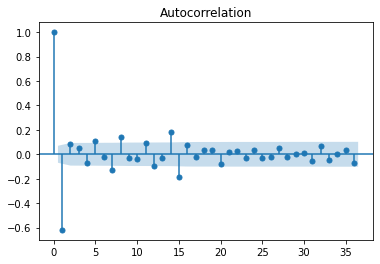

In [41]:
plot_acf(data["DTB3"].diff().diff().diff().dropna(), lags=36)
plt.show()

Differencing the series once is sufficient to remove any unit roots and persistent autocorrelation to change the time series from I(1) to I(0)

In [42]:
# Fit different ARIMA models to check which ones best
from statsmodels.tsa.arima.model import ARIMA
def best_fitting_arima_model(y):
    max_ar_order = 4
    max_ma_order = 4
    for ar_order in range(1, max_ar_order + 1):
        for ma_order in range(max_ma_order + 1):
            arima_results = ARIMA(y, order=(ar_order, 1, ma_order))
            arima_results = arima_results.fit()
            print(f"For ARIMA order {arima_results.model_orders} \nAIC: {arima_results.aic} and BIC: {arima_results.bic}")   

best_fitting_arima_model(data["DTB3"])

For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 0, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 939.812313772084 and BIC: 949.161436555713
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 941.0476851363378 and BIC: 955.071369311781
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 941.8708570743086 and BIC: 960.5691026415662
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 943.5197353040195 and BIC: 966.8925422630916
For ARIMA order {'trend': 0, 'exog': 0,

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 945.0470754554708 and BIC: 973.0944438063574


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 934.4172635352505 and BIC: 967.1391932779516


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 927.4017294340804 and BIC: 964.7982205685958
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 0, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 942.9236740550305 and BIC: 966.2964810141026
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 943.8710526739135 and BIC: 971.9184210248001
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 945.3613290906752 and BIC: 978.0832588333762


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 932.8384796885562 and BIC: 970.2349708230715
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 923.4928256890518 and BIC: 965.5638782153816


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
#We chose model with AR Lags=4, MA Lags=4, Integrating order=1; based on both AIC and BIC results of fit
arima_results = ARIMA(data["DTB3"], order=(4, 1, 4)).fit()
print(f"For ARIMA order {arima_results.model_orders} \nAIC: {arima_results.aic} and BIC: {arima_results.bic}")
arima_results.summary()

For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 923.4928256890518 and BIC: 965.5638782153816


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   DTB3   No. Observations:                  793
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -452.746
Date:                Mon, 08 Apr 2024   AIC                            923.493
Time:                        22:46:05   BIC                            965.564
Sample:                    01-31-1954   HQIC                           939.662
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7083      0.055     12.847      0.000       0.600       0.816
ar.L2         -0.9068      0.078    -11.577      0.000      -1.060      -0.753
ar.L3          0.4867      0.087      5.623      0.000       0.317       0.656
ar.L4         -0.7164      0.061    -11.759      0.000      -0.836      -0.597
ma.L1         -0.5925      0.056    -10.665      0.000      -0.701      -0.484
ma.L2          0.9205      0.071     12.967      0.000       0.781       1.060
ma.L3         -0.4680      0.078     -5.997      0.000      -0.621      -0.315
ma.L4          0.7943      0.056     14.284      0.000       0.685       0.903
sigma2         0.1834      0.003     58.029      0.000       0.177       0.190
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10447.06
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

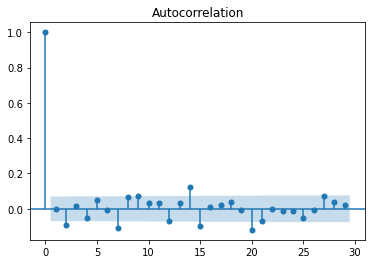

In [55]:
plot_acf(arima_results.resid)
plt.show()

For the chosen model (4,1,4), we see there are oscillations in the ACF and PACF plots, which suggest that the model is not a good fit. There seems to be some seasonality and serial correlation in the data, which is not captured by the ARMA model.